In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

import seaborn as sns

In [2]:
qst = pd.read_excel('Questionnair.xlsx')
qst.head()

,Age group,Gender,Time in Internet,General understanding of e-Health,Have you used e-Health services?,I find e-Health useful for consulting a doctor,Using e-Health encourages me to have faster communication with my doctor,"If I use e-Health, it makes it easier for me to communicate with my doctor",My interaction with e-Health is clear and understandable,I think e-Health is easy to use,...,I was supported during the use of e-Health,I have all the resources needed to use e-Health,I have the knowledge required to use e-Health,I think e-Health fits my lifestyle,How likely are you to seek online advice?,Competences and skills of medical professionals,Ease of use,Quality of services,Protection of personal data,Promotion
0,56 - 65,Male,More than 3 hours,More positive but cautious attitude towards on...,Yes,2.0,2.0,3.0,3.0,3.0,...,2.0,4.0,4.0,2.0,I assume that I will use e-Health in the next ...,NaN,NaN,NaN,NaN,NaN
1,56 - 65,Male,Less than 1 hour,More positive but cautious attitude towards on...,Yes,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,I am going to use e-Health in the next 6 months,NaN,NaN,NaN,NaN,NaN
2,18 - 21,Female,1-3 hours,More positive but cautious attitude towards on...,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,4.0,5.0
3,18 - 21,Male,1-3 hours,Neutral because I do not trust anyone except m...,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0
4,56 - 65,Female,More than 3 hours,More positive but cautious attitude towards on...,Yes,4.0,4.0,4.0,5.0,5.0,...,3.0,5.0,5.0,5.0,I assume that I will use e-Health in the next ...,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Age group")
print(qst['Age group'].value_counts())

print("\n\nGender")
print(qst['Gender'].value_counts())

print("\n\nTime in Internet")
print(qst['Time in Internet'].value_counts())

print("\n\nGeneral understanding of e-Health")
print(qst['General understanding of e-Health'].value_counts())

print("\n\nHave you used e-Health services?")
print(qst['Have you used e-Health services?'].value_counts())

Age group
18 - 21        120
22 - 28         32
29 - 45         24
56 - 65         17
46 - 55         13
66 і більше      1
Name: Age group, dtype: int64


Gender
Female    119
Male       85
Other       3
Name: Gender, dtype: int64


Time in Internet
More than 3 hours    116
1-3 hours             65
Less than 1 hour      26
Name: Time in Internet, dtype: int64


General understanding of e-Health
I don't know that there is such a thing                                  62
More positive but cautious attitude towards online advice                61
Positive, it's quite acceptable, and I trust this advice                 32
I want to receive such consultations, but I do not know how it works     27
Neutral because I do not trust anyone except my doctor                   22
Rather negative, because the Internet is about everything and nothing     2
Негативно – невідомо хто за цим стоїть                                    1
Name: General understanding of e-Health, dtype: int64


Have you used

## People who have used e-Health services

In [4]:
qst_yes = qst[qst['Have you used e-Health services?']=='Yes']
qst_yes = qst_yes.dropna(axis=1)

In [5]:
qst_yes.describe(include='object').T

,count,unique,top,freq
Age group,63,5,18 - 21,25
Gender,63,3,Female,40
Time in Internet,63,3,More than 3 hours,41
General understanding of e-Health,63,6,More positive but cautious attitude towards on...,26
Have you used e-Health services?,63,1,Yes,63
How likely are you to seek online advice?,63,3,I assume that I will use e-Health in the next ...,43


In [6]:
qst_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
I find e-Health useful for consulting a doctor,63.0,4.111111,0.742948,2.0,4.0,4.0,5.0,5.0
Using e-Health encourages me to have faster communication with my doctor,63.0,3.952381,0.887704,2.0,3.5,4.0,5.0,5.0
"If I use e-Health, it makes it easier for me to communicate with my doctor",63.0,3.968254,0.983218,1.0,3.0,4.0,5.0,5.0
My interaction with e-Health is clear and understandable,63.0,3.920635,0.809253,2.0,3.0,4.0,4.5,5.0
I think e-Health is easy to use,63.0,3.920635,0.848178,2.0,3.0,4.0,4.5,5.0
It was easy to learn how to use e-Health,63.0,4.000000,0.762001,2.0,4.0,4.0,4.5,5.0
People who influence my behaviour think I should use e-Health,63.0,2.539683,1.075015,1.0,2.0,3.0,3.0,5.0
People who are important to me think that I should use e-Health,63.0,2.825397,1.070720,1.0,2.0,3.0,3.5,5.0
I was supported during the use of e-Health,63.0,3.333333,1.016001,1.0,3.0,3.0,4.0,5.0
I have all the resources needed to use e-Health,63.0,4.460317,0.617628,2.0,4.0,5.0,5.0,5.0


<AxesSubplot:>

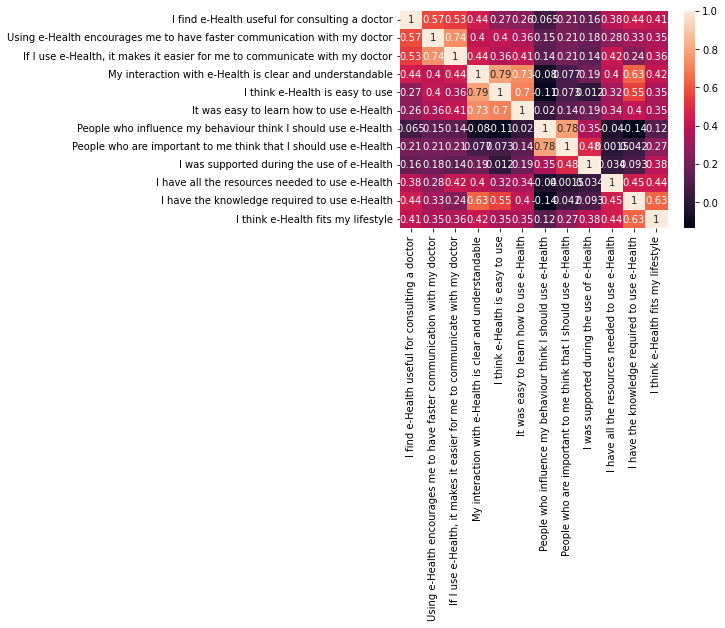

In [7]:
corr = qst_yes.corr()
sns.heatmap(corr, annot = True)

In [8]:
regr = linear_model.LinearRegression()
regr.fit(qst_yes[['Using e-Health encourages me to have faster communication with my doctor']], 
         qst_yes['If I use e-Health, it makes it easier for me to communicate with my doctor'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1

lr.intercept_: 0.7400909681611436
lr.coef_: [0.81676413]


In [9]:
regr.fit(qst_yes[['My interaction with e-Health is clear and understandable', 
                  'It was easy to learn how to use e-Health']], 
         qst_yes['I think e-Health is easy to use'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 0.3010118043844847
lr.coef_: [0.62816189 0.28920742]


In [10]:
regr.fit(qst_yes[['My interaction with e-Health is clear and understandable', 
                  'I have the knowledge required to use e-Health']], 
         qst_yes['I think e-Health is easy to use'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 0.45604565083281834
lr.coef_: [0.77051203 0.09947563]


In [11]:
regr.fit(qst_yes[['I have all the resources needed to use e-Health', 
                  'I have the knowledge required to use e-Health']], 
         qst_yes['I think e-Health fits my lifestyle'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: -1.1769228848890343
lr.coef_: [0.34842849 0.80155778]


## People who havn't used e-Health services

In [12]:
qst_no = qst[qst['Have you used e-Health services?']=='No']
qst_no = qst_no.dropna(axis=1)

In [13]:
qst_no.describe().T

,count,mean,std,min,25%,50%,75%,max
Competences and skills of medical professionals,144.0,3.340278,1.011564,1.0,3.0,3.0,4.0,5.0
Ease of use,144.0,2.604167,1.129507,1.0,2.0,3.0,3.0,5.0
Quality of services,144.0,2.562500,0.958720,1.0,2.0,3.0,3.0,5.0
Protection of personal data,144.0,2.680556,0.986998,1.0,2.0,3.0,3.0,5.0
Promotion,144.0,3.388889,1.333333,1.0,3.0,4.0,5.0,5.0


In [14]:
qst_no.describe(include='object').T

,count,unique,top,freq
Age group,144,6,18 - 21,95
Gender,144,3,Female,79
Time in Internet,144,3,More than 3 hours,75
General understanding of e-Health,144,7,I don't know that there is such a thing,61
Have you used e-Health services?,144,1,No,144


<AxesSubplot:>

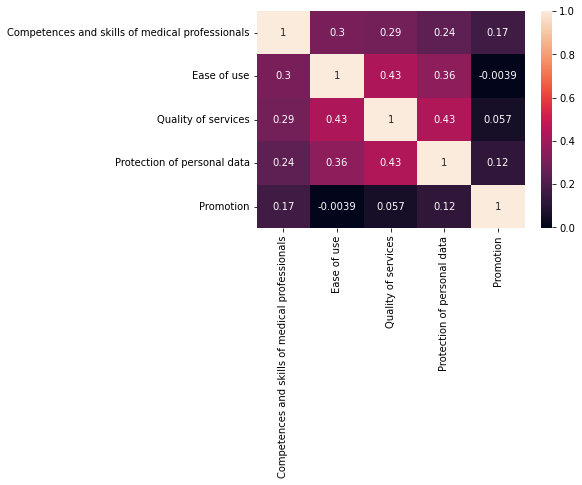

In [15]:
corr = qst_no.corr()
sns.heatmap(corr, annot = True)

In [16]:
regr = linear_model.LinearRegression()
regr.fit(qst_no[['Ease of use', 'Protection of personal data']], qst_no['Quality of services'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 1.0458961947939038
lr.coef_: [0.26661793 0.30675965]


## Data Reliability

In [17]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [18]:
print(cronbach_alpha(qst_yes))
print(cronbach_alpha(qst_no))

0.8884502049363937
0.7582888898569078
